In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from twoDsampler import twoDsamplefromGaussian as tDsfG

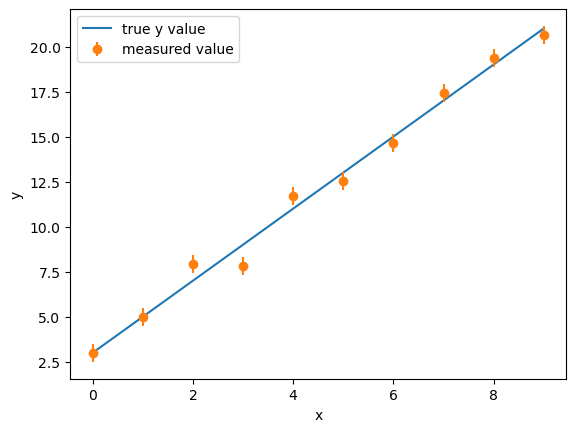

In [12]:
#making my probability function:

#set parameters, arrays
a=2
b=3
sig_y=0.5
data_len=10
y_i=np.zeros(data_len)
x_i=np.zeros(data_len)

def y_hat(x_i):
    return(a*x_i+b)

pi=np.pi
e=np.e

#create my x array, going to choose even spacing
x_i=np.arange(0,data_len)

from numpy import random
for i in range(len(x_i)):
    mean=a*x_i[i]+b
    sigma=sig_y

    s = np.random.normal(mean, sigma, 1)
    y_i[i]=s
    
#print(y_i)

plt.plot(x_i,y_hat(x_i), label="true y value")
plt.errorbar(x_i,y_i, yerr=sig_y, fmt='o', label="measured value")
plt.legend()
plt.ylabel("y")
plt.xlabel("x")

a_guess=np.linspace(a*0.8,a*1.2,500)
b_guess=np.linspace(b*0.8,b*1.2,400)

aa,bb=np.meshgrid(a_guess,b_guess)
chi2vals = np.zeros(np.prod(aa.shape))

#probability function
def prob(point):
    a_val,b_val=point
    val= -0.5*np.sum(((y_i-(a_val*x_i+b_val))/(sig_y))**2 )
    return val


In [13]:
#print(prob([2,3])/prob([0,2]))
#print(prob([0,2])/prob([2,3]))
print(prob([2,3]))
print(-0.5*np.sum(((y_i-(2*x_i+3))/(sig_y))**2 ))
print(sig_y)

-6.846829041028434
-6.846829041028434
0.5


In [31]:
#need to sample through a,b space with 2D sampler
#the sampler moves along the gradient of the probability function

maxstepa=0.01
maxstepb=0.05
initialpoint=[3,2]
numsteps=100000
samples=tDsfG(prob, maxstepa, maxstepb, initialpoint, numsteps)


100%|██████████████████████████████████| 99999/99999 [00:09<00:00, 11101.00it/s]


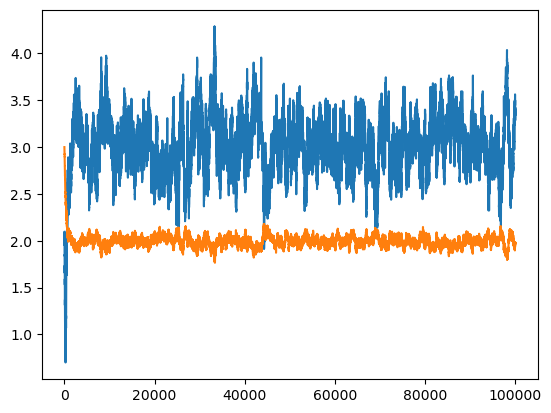

In [32]:
plt.plot(samples[:,1])
plt.plot(samples[:,0])

(100000, 2)


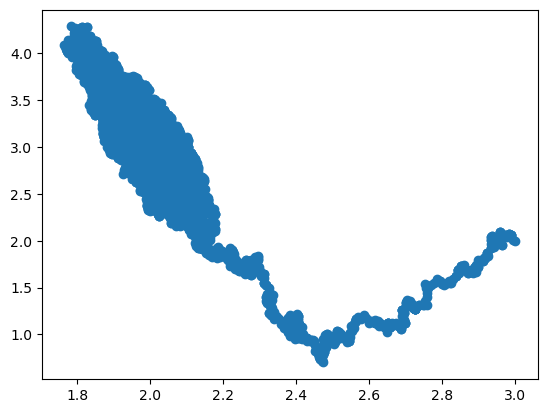

In [33]:
plt.scatter(samples[:,0], samples[:,1])
print(samples.shape)

In [18]:
#print(samples)


In [19]:
def next_pow_two(n):
    """
    find the next power of 2 given n
    """
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorrelation(x, norm=True):
    """
    compute the autocorrelation function of an array
    """
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

def auto_window(taus, c):
    """
    Automated windowing procedure following Sokal (1989)
    """
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1


def acl(x, c=5.0):
    """
    Compute autocorrelation length for x
    """
    N = x.shape[0]
    acf = autocorrelation(x)
    T = 2.0*np.cumsum(acf)-1.0
    return T[auto_window(T, c)]

In [37]:
for i in range(samples.shape[1]):
    print(acl(samples[1000:,i]))

510.7759658084547
536.9601858911027


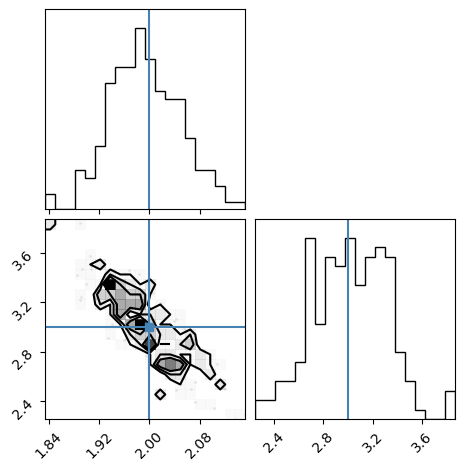

In [38]:
from corner import corner
fig = corner(samples[1000::550], truths = [2,3])

#burn in of first 300 and only uses every 100th sample
#we need to use every nth data point because of the correlation between one data point and the next
#this is due to the finite step size of the sampler so that it sees the whole probability space
#the further away  2 points are the lower the correlation (in general I think)
#truths is the value of a and b used to generate the random data

243.5687333200237
577.0712899744588
